In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.12.0


In [3]:
from tensorflow.python import keras
print(keras.__version__)

2.6.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df=pd.read_csv('wine.csv')

In [104]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [105]:
#Q3. Check for null values, identify categorical variables, and encode them.
df.isnull().sum()
## There is no null values in this dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [107]:
## Quality is the categorical varibale
## change the quality category value to numerical value
df['quality'] =df['quality'].map({"bad":0,"good":1})              

In [108]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [109]:
## split  input and output features
X=df.drop(labels='quality',axis=1)
y=df['quality']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
sclaer=StandardScaler()

In [114]:
X_train=sclaer.fit_transform(X_train)

In [115]:
X_test=sclaer.transform(X_test)

In [68]:
X_train.shape[1]

11

In [116]:
from tensorflow import keras
from tensorflow.keras import regularizers

In [117]:
y_train=keras.utils.to_categorical(y_train,num_classes=2)

In [68]:
##y_test=keras.utils.to_categorical(y_test,num_classes=2)

In [51]:
y_train[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [120]:
model=keras.Sequential([
    keras.layers.Dense(33,activation='relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dense(units=2,activation='sigmoid')
])

In [121]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics='accuracy')

In [122]:
history=model.fit(X_train,y_train,epochs=30,batch_size=100,verbose=2)

Epoch 1/30
12/12 - 2s - loss: 0.6700 - accuracy: 0.5987 - 2s/epoch - 198ms/step
Epoch 2/30
12/12 - 0s - loss: 0.6043 - accuracy: 0.7024 - 56ms/epoch - 5ms/step
Epoch 3/30
12/12 - 0s - loss: 0.5510 - accuracy: 0.7194 - 57ms/epoch - 5ms/step
Epoch 4/30
12/12 - 0s - loss: 0.5363 - accuracy: 0.7274 - 56ms/epoch - 5ms/step
Epoch 5/30
12/12 - 0s - loss: 0.5230 - accuracy: 0.7346 - 60ms/epoch - 5ms/step
Epoch 6/30
12/12 - 0s - loss: 0.5118 - accuracy: 0.7542 - 60ms/epoch - 5ms/step
Epoch 7/30
12/12 - 0s - loss: 0.5071 - accuracy: 0.7587 - 55ms/epoch - 5ms/step
Epoch 8/30
12/12 - 0s - loss: 0.4920 - accuracy: 0.7676 - 47ms/epoch - 4ms/step
Epoch 9/30
12/12 - 0s - loss: 0.4940 - accuracy: 0.7641 - 65ms/epoch - 5ms/step
Epoch 10/30
12/12 - 0s - loss: 0.4832 - accuracy: 0.7748 - 70ms/epoch - 6ms/step
Epoch 11/30
12/12 - 0s - loss: 0.4793 - accuracy: 0.7793 - 54ms/epoch - 5ms/step
Epoch 12/30
12/12 - 0s - loss: 0.4712 - accuracy: 0.7828 - 75ms/epoch - 6ms/step
Epoch 13/30
12/12 - 0s - loss: 0.4687

In [89]:
##model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.6875


[0.6323785781860352, 0.6875]

In [123]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [91]:
np.argmax(y_pred[1])

0

In [124]:
y_pred=[np.argmax(i) for i in y_pred]

In [126]:
y_pred[:5]

[1, 0, 0, 0, 1]

In [127]:
y_test[:5]

803     1
124     0
350     1
682     0
1326    1
Name: quality, dtype: int64

In [128]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 33)                396       
                                                                 
 dense_35 (Dense)            (None, 64)                2176      
                                                                 
 dense_36 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 2)                 130       
                                                                 
Total params: 19,278
Trainable params: 19,278
Non-trai

In [129]:
df=pd.DataFrame(history.history)

<AxesSubplot:>

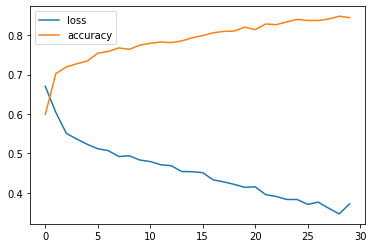

In [130]:
df.plot()

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [132]:
accuracy_score(y_test,y_pred)

0.7541666666666667

In [134]:
cf=confusion_matrix(y_test,y_pred)

Text(33.0, 0.5, 'actual')

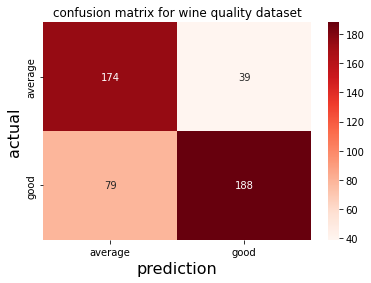

In [135]:
label = ['average','good']
ax = sns.heatmap(cf, annot=True, fmt='d', cmap='Reds', xticklabels=label, yticklabels=label)
ax.set_title('confusion matrix for wine quality dataset')
ax.set_xlabel('prediction', fontsize=16)
ax.set_ylabel('actual', fontsize=16)